In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')
order_products_train = pd.read_csv('data/order_products__train.csv')
orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [84]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [85]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [86]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [87]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [88]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [89]:
user_1 = orders.loc[orders.user_id == 1]
user_1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [9]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [90]:
sample_submission.sort_values(by = 'order_id').head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


## Looking at one user

In [11]:
user_1 = orders.loc[orders.user_id == 1]
user_1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## Ordering most purchased Produce

In [12]:
Combine = order_products_train.merge(orders, on = 'order_id')

In [13]:
line = Combine.merge(products, on = 'product_id')

In [14]:
top_products = line.groupby('product_id').agg('count').sort_values(by = 'order_id',ascending = False)\
.head(15).reset_index()
top_products = top_products[['product_id','order_id']]
top_products = top_products.merge(products, on = 'product_id').rename(columns={'order_id':'Quantity'})
top_products[['Quantity','product_name']].head()

,Quantity,product_name
0,18726,Banana
1,15480,Bag of Organic Bananas
2,10894,Organic Strawberries
3,9784,Organic Baby Spinach
4,8135,Large Lemon


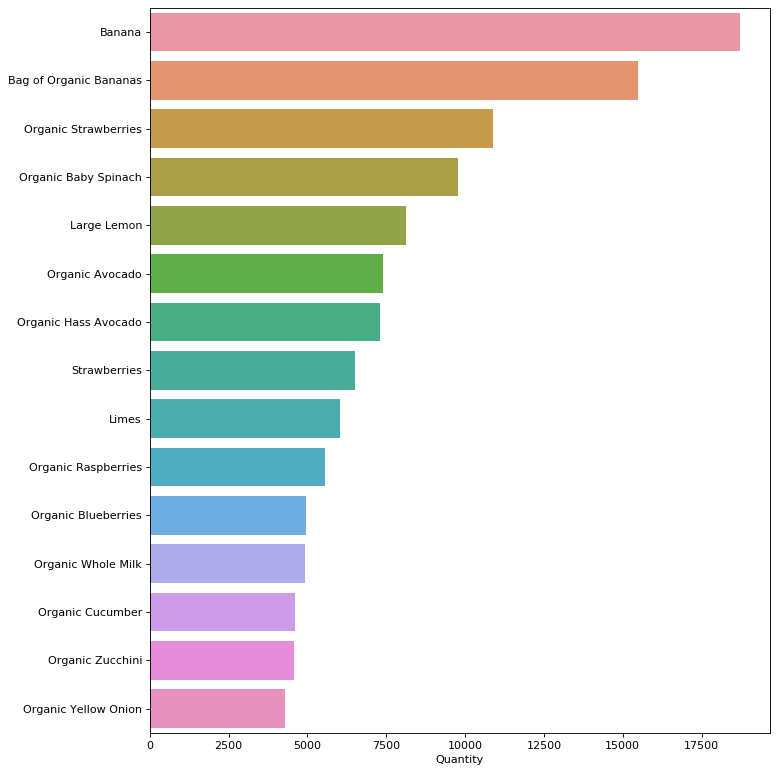

In [15]:
plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(y = top_products.product_name, x = top_products.Quantity)
plt.ylabel('')
plt.show()

## sales by DOW

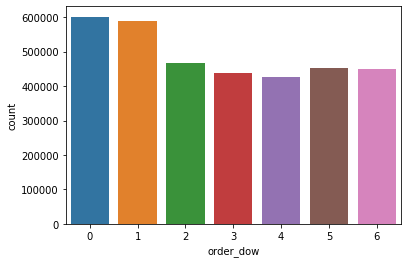

In [47]:
order_by_dow = orders.groupby('order_dow').agg({'order_dow':['count']}).order_dow.reset_index()
sns.barplot(y = order_by_dow['count'], x = order_by_dow['order_dow'])
plt.show()

## Sales by HOD

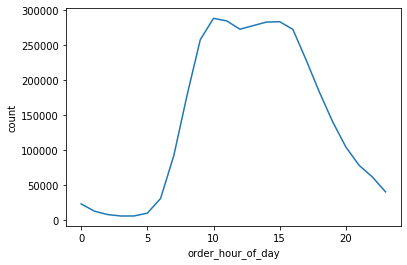

In [49]:
order_by_hod = orders.groupby('order_hour_of_day').agg({'order_hour_of_day':['count']}).order_hour_of_day.reset_index()
sns.lineplot(y = order_by_hod['count'], x = order_by_hod['order_hour_of_day'])
plt.show()

---

## Merging keyfood

In [22]:
keyfood_data = pd.read_csv('data/keyfood_data2.csv')
ctown = pd.read_csv('data/ctowndataw001.csv')

In [30]:
price_keyfood = keyfood_data[['nameKF','PriceKFF']].rename({'nameKF':'product_name','PriceKFF':'Price'},axis =1)
price_ctown   = ctown[['nameCT','priceFinalCT']].rename({'nameCT':'product_name','priceFinalCT':'Price'},axis = 1)
product_price = pd.concat([price_keyfood,price_ctown])
product_price

,product_name,Price
0,Beechnut Cereal,1.99
1,Gerber 1st Food Baby Food,1
2,Gerber 2nd Food Organic Pouches,1.5
3,Happy Baby Baby Food,1.25
4,Happy Baby Coconut Milk,1.25
...,...,...
302,toufayan pita bread,1.5
303,turkey breakfast sausage,3.99
304,western sweet cantaloupes,2.5
305,whole pork shoulder,1.49


In [31]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [33]:
products.merge(product_price, on= 'product_name',how = 'inner').product_name.nunique

<bound method IndexOpsMixin.nunique of 0                     Red Onions
1                 Tilapia Fillet
2                   Red Potatoes
3                        Rhubarb
4                   Sea Scallops
5                Romaine Lettuce
6                Russet Potatoes
7                 Macaroni Salad
8                 Macaroni Salad
9                 Romaine Hearts
10                Romaine Hearts
11                Sweet Potatoes
12          Twice Baked Potatoes
13                Grape Tomatoes
14                Grape Tomatoes
15                   Cantaloupes
16                   Cantaloupes
17    Honey Maid Graham Crackers
18           Pork Baby Back Ribs
19                   Ground Beef
20                   Ground Beef
Name: product_name, dtype: object>